# Exploratory data analysis

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the file
dict_types = {'Comments_amount':'int16',
              'Views':'int32',
              'User_score':'float32',
              'Score_amount':'int16',
              'Sg_score':'category'}

df = pd.read_csv('stopgame_transformed.csv', sep='\t', parse_dates=['Release_date', 'Review_date'], dtype=dict_types)
df

,Title,Genre,Platfrom,Release_date,Review_date,Comments_amount,Views,Author,Platform_played,User_score,Score_amount,Sg_score
0,Lies of P: ДУШно,Экшн,"['PC', 'PS4', 'PS5', 'XONE', 'XBOXSX']",2023-09-19,2023-09-14,53,6887,Василий Гальперов,PC,5.0,3,pohvalno
1,Armored Core VI: Fires of Rubicon: Не Dark Souls,Экшн,"['PC', 'PS4', 'PS5', 'XONE', 'XBOXSX']",2023-08-25,2023-09-01,52,9730,Василий Гальперов,Sony PlayStation 5,4.1,69,pohvalno
2,Baldur’s Gate III: Всё сложно,Приключение,"['PC', 'Mac', 'PS5', 'XBOXSX', 'Stadia']",2023-08-03,2023-08-29,93,12676,Максим Милязев,PC,4.7,724,izum
3,Stray Gods: The Roleplaying Musical: Мюзикл от...,Приключение,"['PC', 'PS4', 'PS5', 'XONE', 'XBOXSX', 'NSW']",2023-08-10,2023-08-25,99,7652,Ян Грибович,PC,3.9,16,izum
4,Shadow Gambit: The Cursed Crew: Пиратская копия,Экшн,"['PC', 'PS5', 'XBOXSX']",2023-08-17,2023-08-21,52,7595,Даур Авидзба,PC,4.4,18,pohvalno
...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Mass Effect,Ролевая,"['PC', 'PS3', 'PS4', 'PS5', 'X360', 'XONE', 'X...",2007-11-20,2008-06-08,1,25912,Максим Кулаков,PC,4.4,2989,NaN
1113,Race Driver: GRID,Аркада,"['PC', 'PS3', 'X360']",2008-06-03,2008-06-04,0,25270,Максим Кулаков,PC,4.5,516,NaN
1114,Operation Thunderstorm,Экшн,['PC'],2008-09-25,2008-05-21,4,25818,Максим Кулаков,PC,3.3,18,NaN
1115,Tom Clancy's Rainbow Six: Vegas 2,Экшн,"['PC', 'PS3', 'X360', 'XONE', 'XBOXSX']",2008-04-10,2008-05-15,7,38112,Максим Кулаков,NaN,4.0,262,NaN


In [3]:
# check initial info and memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            1117 non-null   object        
 1   Genre            1117 non-null   object        
 2   Platfrom         1117 non-null   object        
 3   Release_date     1117 non-null   datetime64[ns]
 4   Review_date      1117 non-null   datetime64[ns]
 5   Comments_amount  1117 non-null   int16         
 6   Views            1117 non-null   int32         
 7   Author           1117 non-null   object        
 8   Platform_played  665 non-null    object        
 9   User_score       1117 non-null   float32       
 10  Score_amount     1117 non-null   int16         
 11  Sg_score         1043 non-null   category      
dtypes: category(1), datetime64[ns](2), float32(1), int16(2), int32(1), object(5)
memory usage: 507.8 KB


In [4]:
# check unusual in author colomn
df['Author'].unique()

array(['Василий Гальперов', 'Максим Милязев', 'Ян Грибович',
       'Даур Авидзба', 'Василий Русяев', 'Катерина Краснопольская',
       'Илья Шарифов', 'Иван Лоев', 'Антон Паули', 'Дмитрий Бурдуков',
       'Максим Орлов', 'Играли на PC', 'Диана Урбанович',
       'Александр Вилисов', 'Эльман Гусейнов', 'Андрей Данилов',
       'Глеб Мещеряков', 'Константин Тростенюк', 'Максим Солодилов',
       'Алекс Давтян', 'Дмитрий Кунгуров', 'Денис Карамышев',
       'Евгений Баранов', 'Максим Кулаков', 'Михаил Нарица',
       'Александра Кост', 'Андрей Маковеев', 'Игорь Суров',
       'Андрей Артамохин', 'Сергей Быков', 'Степан Чечулин',
       'Кирилл Орешкин', 'Ярослав Шалашов', 'Алиса Селезнева',
       'Александр Седых', 'Александр Дорошенко', 'AlexFX', 'skv'],
      dtype=object)

There is strange name 'Играли на PC' among authors' names, which is actually not a human name. So we drop the rows with it.

In [5]:
# delete rows with author 'Играли на PC' which means several authors or none authors of one review
df = df.loc[df['Author'] != 'Играли на PC']
df

,Title,Genre,Platfrom,Release_date,Review_date,Comments_amount,Views,Author,Platform_played,User_score,Score_amount,Sg_score
0,Lies of P: ДУШно,Экшн,"['PC', 'PS4', 'PS5', 'XONE', 'XBOXSX']",2023-09-19,2023-09-14,53,6887,Василий Гальперов,PC,5.0,3,pohvalno
1,Armored Core VI: Fires of Rubicon: Не Dark Souls,Экшн,"['PC', 'PS4', 'PS5', 'XONE', 'XBOXSX']",2023-08-25,2023-09-01,52,9730,Василий Гальперов,Sony PlayStation 5,4.1,69,pohvalno
2,Baldur’s Gate III: Всё сложно,Приключение,"['PC', 'Mac', 'PS5', 'XBOXSX', 'Stadia']",2023-08-03,2023-08-29,93,12676,Максим Милязев,PC,4.7,724,izum
3,Stray Gods: The Roleplaying Musical: Мюзикл от...,Приключение,"['PC', 'PS4', 'PS5', 'XONE', 'XBOXSX', 'NSW']",2023-08-10,2023-08-25,99,7652,Ян Грибович,PC,3.9,16,izum
4,Shadow Gambit: The Cursed Crew: Пиратская копия,Экшн,"['PC', 'PS5', 'XBOXSX']",2023-08-17,2023-08-21,52,7595,Даур Авидзба,PC,4.4,18,pohvalno
...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Mass Effect,Ролевая,"['PC', 'PS3', 'PS4', 'PS5', 'X360', 'XONE', 'X...",2007-11-20,2008-06-08,1,25912,Максим Кулаков,PC,4.4,2989,NaN
1113,Race Driver: GRID,Аркада,"['PC', 'PS3', 'X360']",2008-06-03,2008-06-04,0,25270,Максим Кулаков,PC,4.5,516,NaN
1114,Operation Thunderstorm,Экшн,['PC'],2008-09-25,2008-05-21,4,25818,Максим Кулаков,PC,3.3,18,NaN
1115,Tom Clancy's Rainbow Six: Vegas 2,Экшн,"['PC', 'PS3', 'X360', 'XONE', 'XBOXSX']",2008-04-10,2008-05-15,7,38112,Максим Кулаков,NaN,4.0,262,NaN


In [6]:
# check descriptive statistic
df.describe(include='all')

,Title,Genre,Platfrom,Release_date,Review_date,Comments_amount,Views,Author,Platform_played,User_score,Score_amount,Sg_score
count,1114,1114,1114,1114,1114,1114.000000,1114.000000,1114,665,1114.000000,1114.000000,1041
unique,1111,14,297,NaN,NaN,NaN,NaN,37,10,NaN,NaN,4
top,Borderlands 3,Экшн,"['PC', 'PS4', 'PS5', 'XONE', 'XBOXSX']",NaN,NaN,NaN,NaN,Василий Гальперов,PC,NaN,NaN,pohvalno
freq,2,562,125,NaN,NaN,NaN,NaN,207,437,NaN,NaN,468
mean,NaN,NaN,NaN,2015-07-15 08:48:41.364452352,2015-09-18 01:44:42.226211840,79.292639,35379.453321,NaN,NaN,3.721454,503.947038,NaN
min,NaN,NaN,NaN,2002-03-22 00:00:00,2008-05-07 00:00:00,0.000000,5226.000000,NaN,NaN,1.000000,2.000000,NaN
25%,NaN,NaN,NaN,2012-01-19 00:00:00,2012-04-05 12:00:00,31.000000,18124.500000,NaN,NaN,3.400000,70.000000,NaN
50%,NaN,NaN,NaN,2015-06-28 00:00:00,2015-09-26 00:00:00,56.000000,27690.000000,NaN,NaN,3.900000,208.000000,NaN
75%,NaN,NaN,NaN,2018-10-31 12:00:00,2018-11-25 12:00:00,101.000000,45320.250000,NaN,NaN,4.200000,604.250000,NaN
max,NaN,NaN,NaN,2023-09-19 00:00:00,2023-09-14 00:00:00,542.000000,380710.000000,NaN,NaN,5.000000,6712.000000,NaN


In [7]:
# check unusual values in Platform_played colomn
df['Platform_played'].unique()

array(['PC', 'Sony PlayStation 5', 'Android', 'Nintendo Switch',
       'Microsoft Xbox Series X | S', 'Sony PlayStation 4',
       'Microsoft Xbox One', nan, 'Sony PlayStation 3', 'Nintendo Wii U',
       'Microsoft Xbox 360'], dtype=object)

In [8]:
# check unusual values in Platform_played colomn
df['Genre'].unique()

array(['Экшн', 'Приключение', 'Аркада', 'Карточная', 'Ролевая', 'Файтинг',
       'Стратегия', 'Гонки', 'Симулятор', 'Онлайн', 'Головоломка',
       'Дополнение', 'Спортивная', 'ММО'], dtype=object)

In [9]:
# check how many games have several reviews on one game
df.loc[df.duplicated(subset=['Title'])]

,Title,Genre,Platfrom,Release_date,Review_date,Comments_amount,Views,Author,Platform_played,User_score,Score_amount,Sg_score
227,Borderlands 3,Экшн,"['PC', 'Mac', 'PS4', 'PS5', 'XONE', 'XBOXSX', ...",2019-09-13,2019-09-21,108,22747,Иван Лоев,Sony PlayStation 4,3.9,629,pohvalno
606,Life is Strange,Экшн,"['PC', 'Mac', 'Linux', 'PS3', 'PS4', 'PS5', 'X...",2015-01-30,2015-02-03,117,38735,Александра Кост,PC,4.2,1589,pohvalno
802,The Walking Dead: A Telltale Series,Приключение,"['PC', 'Mac', 'Linux', 'PS3', 'PS4', 'PS5', 'P...",2012-04-24,2012-09-20,166,36510,Александра Кост,PC,4.5,1666,pohvalno


In [10]:
# show repeated reviews
df[df['Title'].duplicated(keep=False)]

,Title,Genre,Platfrom,Release_date,Review_date,Comments_amount,Views,Author,Platform_played,User_score,Score_amount,Sg_score
139,Borderlands 3,Экшн,"['PC', 'Mac', 'PS4', 'PS5', 'XONE', 'XBOXSX', ...",2019-09-13,2021-01-27,24,24624,Иван Лоев,Sony PlayStation 4,3.9,629,pohvalno
227,Borderlands 3,Экшн,"['PC', 'Mac', 'PS4', 'PS5', 'XONE', 'XBOXSX', ...",2019-09-13,2019-09-21,108,22747,Иван Лоев,Sony PlayStation 4,3.9,629,pohvalno
551,Life is Strange,Экшн,"['PC', 'Mac', 'Linux', 'PS3', 'PS4', 'PS5', 'X...",2015-01-30,2015-10-30,102,27585,Александра Кост,PC,4.2,1589,pohvalno
606,Life is Strange,Экшн,"['PC', 'Mac', 'Linux', 'PS3', 'PS4', 'PS5', 'X...",2015-01-30,2015-02-03,117,38735,Александра Кост,PC,4.2,1589,pohvalno
777,The Walking Dead: A Telltale Series,Приключение,"['PC', 'Mac', 'Linux', 'PS3', 'PS4', 'PS5', 'P...",2012-04-24,2012-12-07,166,44397,Александра Кост,NaN,4.5,1666,pohvalno
802,The Walking Dead: A Telltale Series,Приключение,"['PC', 'Mac', 'Linux', 'PS3', 'PS4', 'PS5', 'P...",2012-04-24,2012-09-20,166,36510,Александра Кост,PC,4.5,1666,pohvalno


Three games have two reviews, two of those games was reviewed in the same year.

In [11]:
# show top 5 reviews by views
df.nlargest(5, ['Views'])

,Title,Genre,Platfrom,Release_date,Review_date,Comments_amount,Views,Author,Platform_played,User_score,Score_amount,Sg_score
743,Assassin's Creed III: Tyranny of King Washington,Экшн,"['PC', 'PS3', 'PS4', 'PS5', 'X360', 'XONE', 'X...",2013-02-20,2013-04-29,100,380710,Максим Кулаков,PC,3.2,189,prohodnyak
683,Thief,Экшн,"['PC', 'Mac', 'PS3', 'PS4', 'PS5', 'X360', 'XO...",2014-02-25,2014-02-28,286,187855,Иван Лоев,NaN,3.8,1363,izum
975,Mafia II,Экшн,"['PC', 'Mac', 'PS3', 'PS4', 'PS5', 'X360', 'XO...",2010-08-24,2010-08-31,542,170230,Максим Кулаков,NaN,4.2,2764,pohvalno
899,Seven Souls Online,Онлайн,['PC'],2010-06-30,2011-05-04,70,168850,Сергей Быков,PC,3.5,10,pohvalno
1005,Assassin's Creed II,Экшн,"['PC', 'Mac', 'PS3', 'PS4', 'PS5', 'X360', 'XO...",2009-11-17,2010-03-18,185,150676,Максим Кулаков,NaN,4.4,3239,pohvalno


In [12]:
# show top 5 authors by views
df.groupby('Author')['Views'].sum().sort_values(ascending=False).head(5)

Author
Василий Гальперов    6762056
Максим Кулаков       5160569
Иван Лоев            4856096
Александра Кост      3386728
Кирилл Орешкин       3069119
Name: Views, dtype: int32

In [13]:
# share of top 5 in total
round(sum(
    df.groupby('Author')['Views'].sum().sort_values(ascending=False).head(5)*100 / \
    sum(df.groupby('Author')['Views'].sum().sort_values(ascending=False))
), 2)

58.95

Top 5 authors provided almost 60% of total reviews

Text(0, 0.5, 'count')

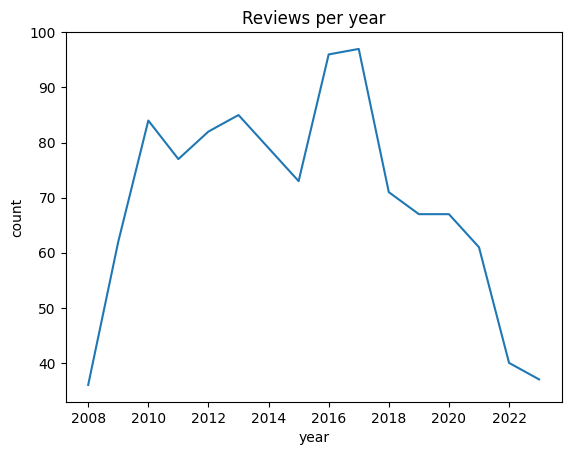

In [14]:
# show number of reviews by the year
ax = df['Review_date'].dt.year.value_counts().sort_index().plot(title='Reviews per year')
ax.set_xlabel('year')
ax.set_ylabel('count')

Number of reviews have been decreasing since 2017.

Text(0, 0.5, 'Count')

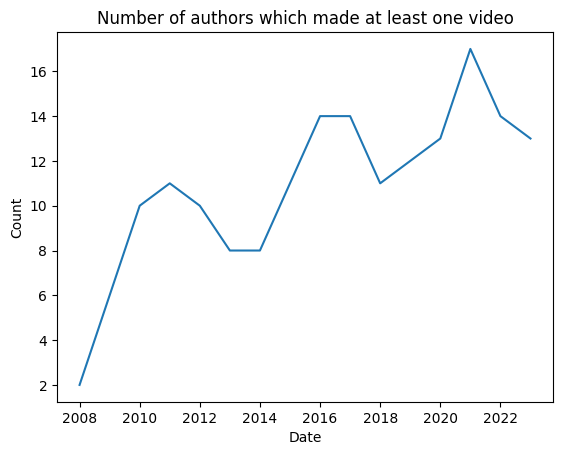

In [15]:
# show number of unique author made at least one video in a year
ax= df.groupby(df['Review_date'].dt.year)['Author'].nunique().plot(title='Number of authors which made at least one video')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

There is an increasing the number of authors who made at least 1 video in the year.

<Axes: xlabel='Review_date', ylabel='Views'>

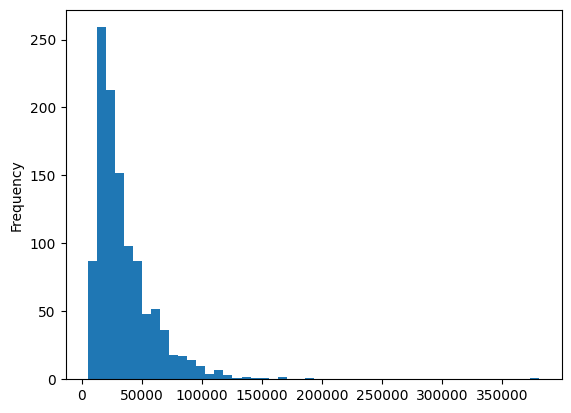

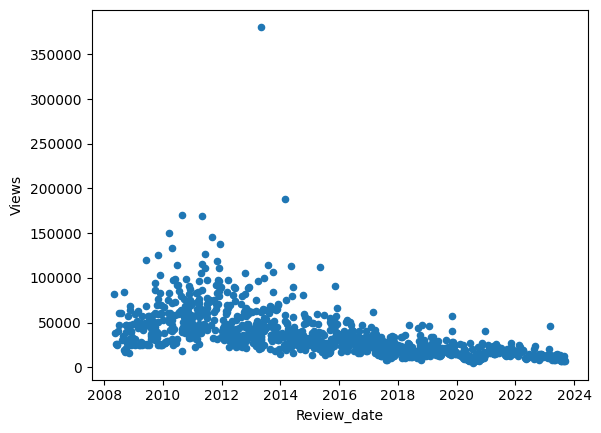

In [16]:
# check data distribution and possible outliers graphicaly
df['Views'].plot(kind='hist', bins=50)
df.plot.scatter(x='Review_date', y='Views')

Data are not normally distributed. One video may be considered as outlier.

In [17]:
# see dependency between amount of users' score and views by authors' score
import plotly.io as pio
pio.renderers.default = "notebook_connected"
fig = px.scatter(df, x='Score_amount', y='Views', color='Sg_score', trendline='ols', trendline_scope='overall')
fig.show()
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     432.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.01e-81
Time:                        22:13:42   Log-Likelihood:                -12724.
No. Observations:                1114   AIC:                         2.545e+04
Df Residuals:                    1112   BIC:                         2.546e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.599e+04    801.487     32.428      0.000    2.44e+04    2.76e+04
x1            18.6301      0.896     20.800      0.000      16.873      20.388
==============================================================================
Omnibus:                     1172.241   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170761.762
Skew:                           4.679   Prob(JB):                         0.00
Kurtosis:                      62.928   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see positive dependency between amount of users' score and views by authors' score.
This dependency is not very strong ($R^2 \approx 0.3$).

In [18]:
# check stopgame's scores by author from the number of highest score - izum
(df.pivot_table(index=['Author'], columns=['Sg_score'], values=['Views'], aggfunc=['count'], margins=True)
 .sort_values(by=[('count', 'Views', 'izum')], ascending=False))

count                                  
                        Views                                  
Sg_score                 izum musor pohvalno prohodnyak     All
Author                                                         
All                       278    45      468        250  1041.0
Василий Гальперов          58    17       87         44   206.0
Иван Лоев                  47     4       80         42   173.0
Глеб Мещеряков             22     2       41          9    74.0
Александра Кост            20     3       39         16    78.0
Кирилл Орешкин             17     2       21          4    44.0
Степан Чечулин             15     0       19          8    42.0
Максим Кулаков             12     1       24         11    48.0
Катерина Краснопольская    10     0       11          8    29.0
Михаил Нарица               9     2       14          6    31.0
Даур Авидзба                9     1        7          5    22.0
Константин Тростенюк        8     0        6          2    16.0
Игорь Суров                 6     2        6          3    17.0
Денис Карамышев             6     0        7          6    19.0
Дмитрий Кунгуров            5     1       12          9    27.0
Василий Русяев              4     1        0          5    10.0
Андрей Маковеев             4     0       10          4    18.0
Ян Грибович                 4     2        1          2     9.0
Максим Солодилов            4     1        5          3    13.0
Александр Седых             4     0        7          4    15.0
Максим Милязев              3     1        2          3     9.0
Дмитрий Бурдуков            3     0       13          8    24.0
Евгений Баранов             2     0       15          6    23.0
Александр Вилисов           2     2       11         13    28.0
Эльман Гусейнов             1     0        5          5    11.0
Сергей Быков                1     0       10         10    21.0
Максим Орлов                1     0        1          2     4.0
Антон Паули                 1     0        1          1     3.0
Александр Дорошенко         0     0        2          1     3.0
skv                         0     0        0          0     NaN
Алиса Селезнева             0     1        2          1     4.0
Андрей Артамохин            0     0        1          0     1.0
Илья Шарифов                0     2        3          2     7.0
Алекс Давтян                0     0        0          1     1.0
Андрей Данилов              0     0        4          5     9.0
Диана Урбанович             0     0        0          1     1.0
Ярослав Шалашов             0     0        1          0     1.0
AlexFX                      0     0        0          0     NaN

Author Василий Гальперов has the most number of reviews and he gave the highest score most times.

In [19]:
# check stopgame's scores by author from the number of highest score - izum
(df.pivot_table(index=['Genre'], columns=['Sg_score'], values=['Views']
                , aggfunc=['count'], margins=True, margins_name='Total')
 .sort_values(by=[('count', 'Views', 'izum')], ascending=False))

count                                
            Views                                
Sg_score     izum musor pohvalno prohodnyak Total
Genre                                            
Total         278    45      468        250  1041
Экшн          125    28      217        150   520
Аркада         43     4       74         29   150
Ролевая        35     2       33         17    87
Приключение    32     6       39         24   101
Стратегия      21     3       36         13    73
Гонки           5     0       16          4    25
Дополнение      5     0       22          1    28
Спортивная      4     0        3          3    10
Головоломка     3     1        5          1    10
Карточная       2     0        2          1     5
Симулятор       2     0        5          5    12
Файтинг         1     1        2          0     4
ММО             0     0        1          0     1
Онлайн          0     0       13          2    15

'Экшн' is the most popular genre in stopgame's reviews with the highest number of the highest score.

In [20]:
# find out how much time passed from the first review to the last one
calendar = (df.sort_values(['Review_date']).pivot_table(index=['Author'], values=['Review_date']
                                                       , aggfunc=['first', 'last'])
            .sort_values([('last', 'Review_date')], ascending=False))
calendar['duration'] = (calendar['last'] - calendar['first']) + pd.Timedelta(days=1)
calendar['duration'] = round(calendar['duration'].dt.days / 365, 2)
calendar.sort_values(['duration'], ascending=False)

,first,last,duration
,Review_date,Review_date,
Author,,,
Василий Гальперов,2011-10-27,2023-09-14,11.89
Иван Лоев,2011-10-13,2023-07-21,11.78
Глеб Мещеряков,2010-11-25,2022-08-14,11.73
Максим Кулаков,2008-05-07,2018-11-27,10.57
Константин Тростенюк,2011-12-07,2021-11-11,9.94
Андрей Маковеев,2010-04-19,2017-09-09,7.40
Александра Кост,2010-08-23,2017-11-24,7.26
Максим Солодилов,2014-12-15,2021-08-26,6.70


There are 4 authors who had been producing the reviews for ten and more years and 9 authors - for less than a year.

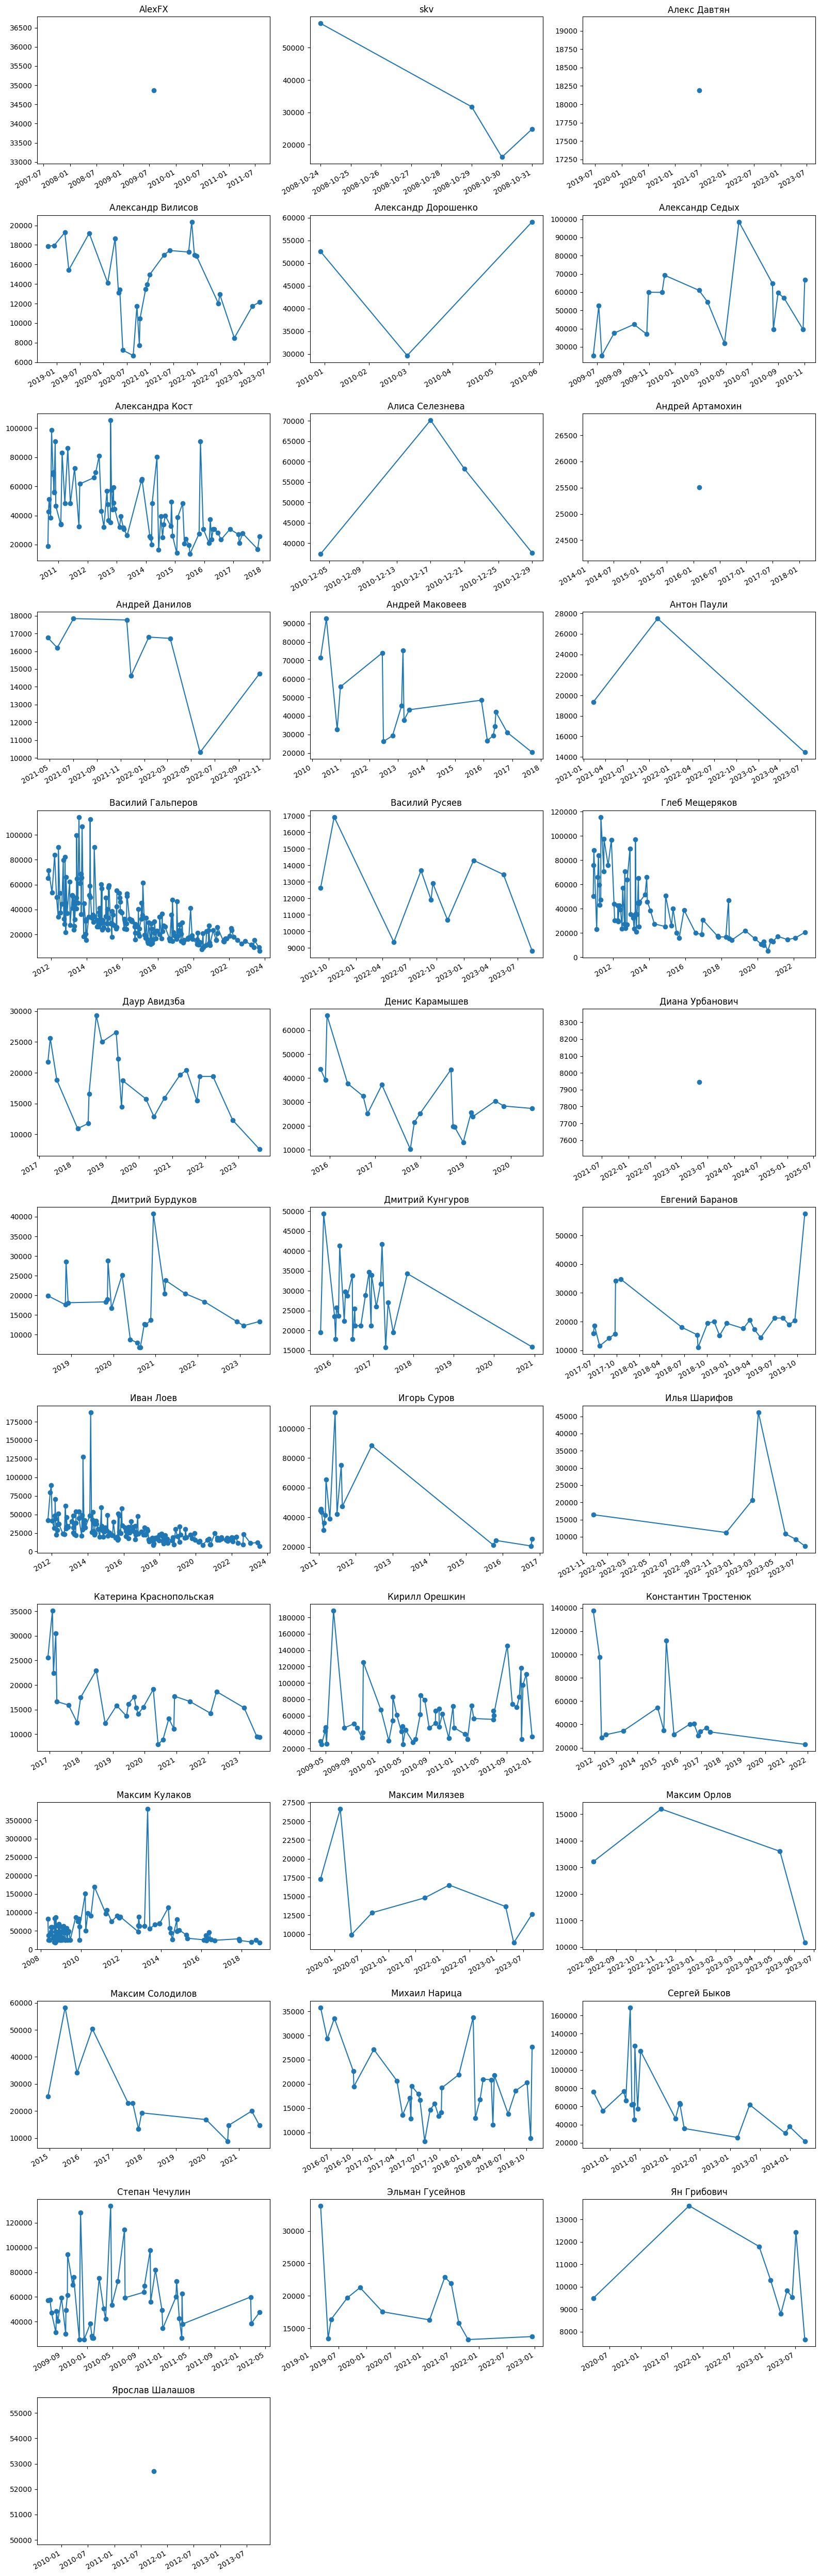

In [21]:
# check view dynamics of every author by date

# create auxilary dataframe
author_views_per_date = (df.sort_values(['Review_date'])
                         .pivot_table(index=['Review_date'], columns=['Author'], values=['Views'], aggfunc=['sum']))

# drop multiindex
author_views_per_date.columns = author_views_per_date.columns.droplevel([0, 1])

# create plost
fig=plt.figure(figsize=(16,50))
for i in range(len(author_views_per_date.columns)):
    ax=fig.add_subplot(len(author_views_per_date.columns)//3+1,3,i+1)
    subdf = author_views_per_date[author_views_per_date[author_views_per_date.columns[i]].notnull()]
    ax.plot(subdf.index
            , subdf[author_views_per_date.columns[i]], '-o')
    ax.set_title(author_views_per_date.columns[i])
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()

There is no any pattern in dynamics views

# Data analysis

Let's see if types of genre differ by views. One of way to find out it is to use ANOVA test.

Our null hypothesis is:
$$H_0: \mu_1 = \mu_2 = \ldots = \mu_n,$$
where $n$ is the number of groups (genres).

This means that there are no differences between genres' means and thus between genres in generally.

Alternative hypothesis is:
$$H_1: \mu_i \neq \mu_j, \forall i \neq j$$

In [22]:
# select columns for analysis
sliced_df = df[['Genre', 'Views']]
sliced_df

,Genre,Views
0,Экшн,6887
1,Экшн,9730
2,Приключение,12676
3,Приключение,7652
4,Экшн,7595
...,...,...
1112,Ролевая,25912
1113,Аркада,25270
1114,Экшн,25818
1115,Экшн,38112


In [23]:
# look at number of reviews in each genre
sliced_df.groupby(['Genre'])['Views'].count()

Genre
Аркада         162
Головоломка     10
Гонки           25
Дополнение      29
Карточная        5
ММО              1
Онлайн          18
Приключение    102
Ролевая         92
Симулятор       14
Спортивная      11
Стратегия       79
Файтинг          4
Экшн           562
Name: Views, dtype: int64

We can see big disproportions in genre's views. It's not the limitation for ANOVA test, but  it can be lead to two potential issues: reduced statistical power and reduced robustness to unequal variance.

In [24]:
# select genres with at least 10 reviews
sliced_df = sliced_df.groupby(['Genre']).filter(lambda x: len(x) > 9)
sliced_df

,Genre,Views
0,Экшн,6887
1,Экшн,9730
2,Приключение,12676
3,Приключение,7652
4,Экшн,7595
...,...,...
1112,Ролевая,25912
1113,Аркада,25270
1114,Экшн,25818
1115,Экшн,38112


Check if ANOVA assumptions are met.

Firstly, check the normality of the data in each group of the genre

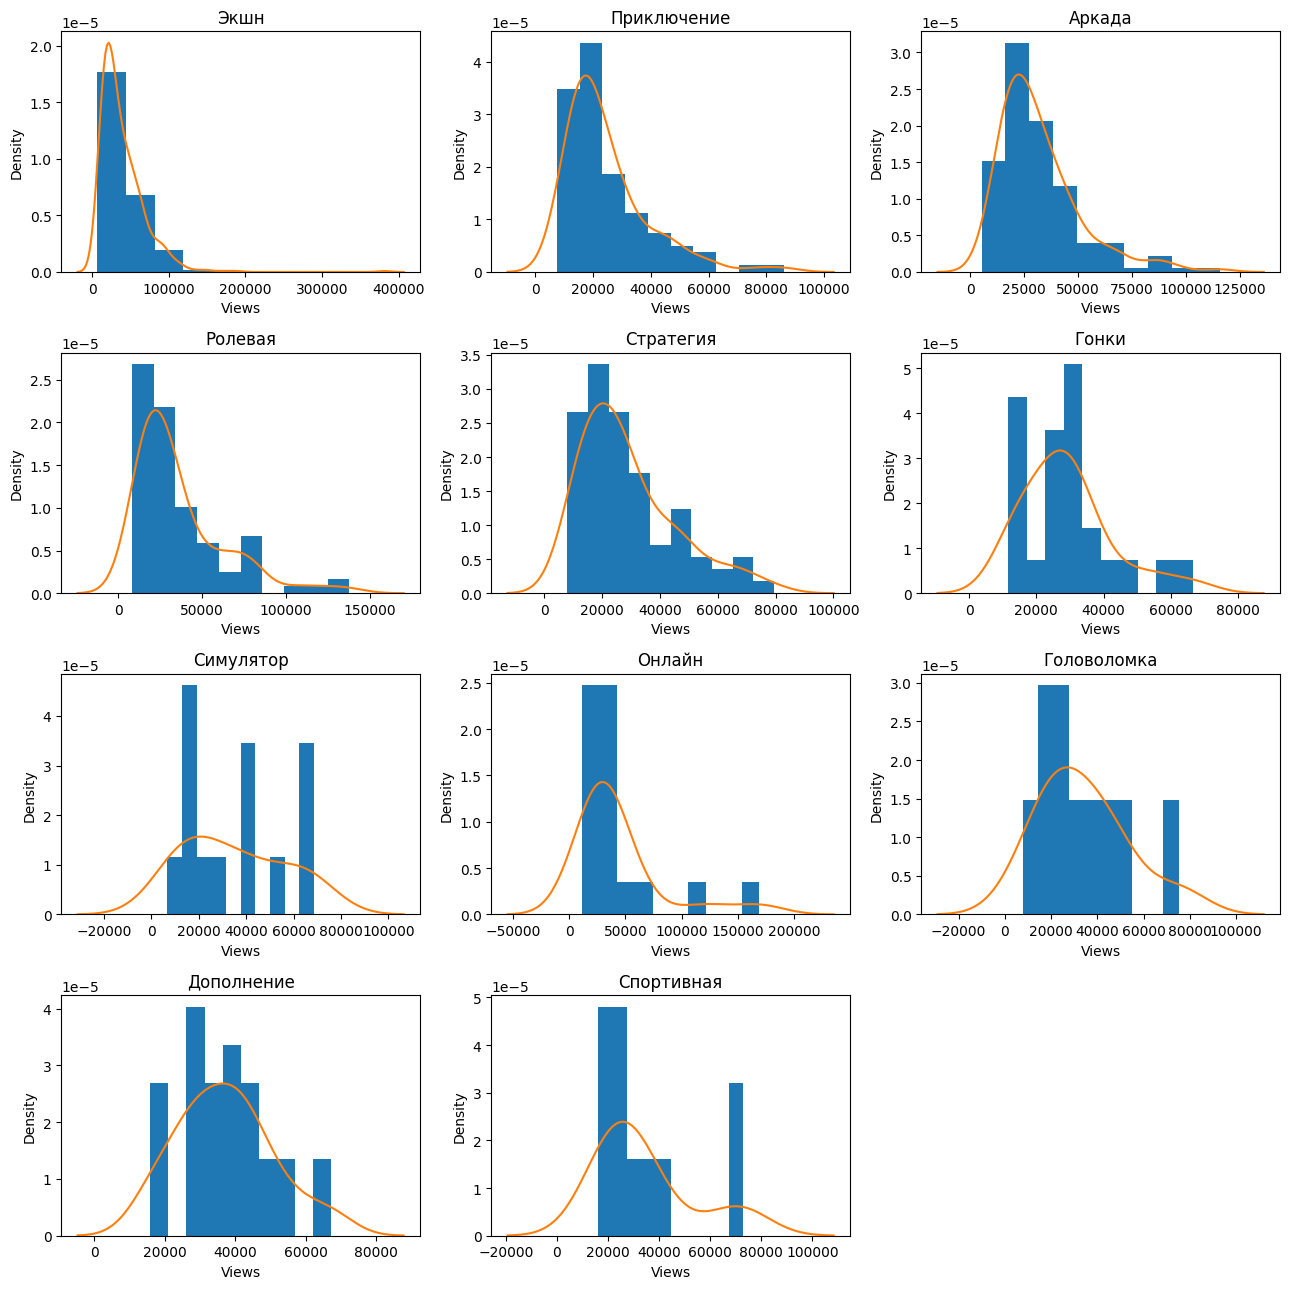

In [25]:
# check groups' normality using histogram
for_test_variance = []
genres = []
i = 0
fig=plt.figure(figsize=(13,13))
for genre in sliced_df['Genre'].unique():
    ax=fig.add_subplot(len(sliced_df['Genre'].unique())//3+1,3,i+1)
    ax.hist(sliced_df['Views'][sliced_df['Genre'] == genre], density=True)
    sns.kdeplot(sliced_df['Views'][sliced_df['Genre'] == genre])
    ax.set_title(genre)
    ax.set_xlabel('Views')
    ax.set_ylabel('Density')
    i += 1
plt.tight_layout()

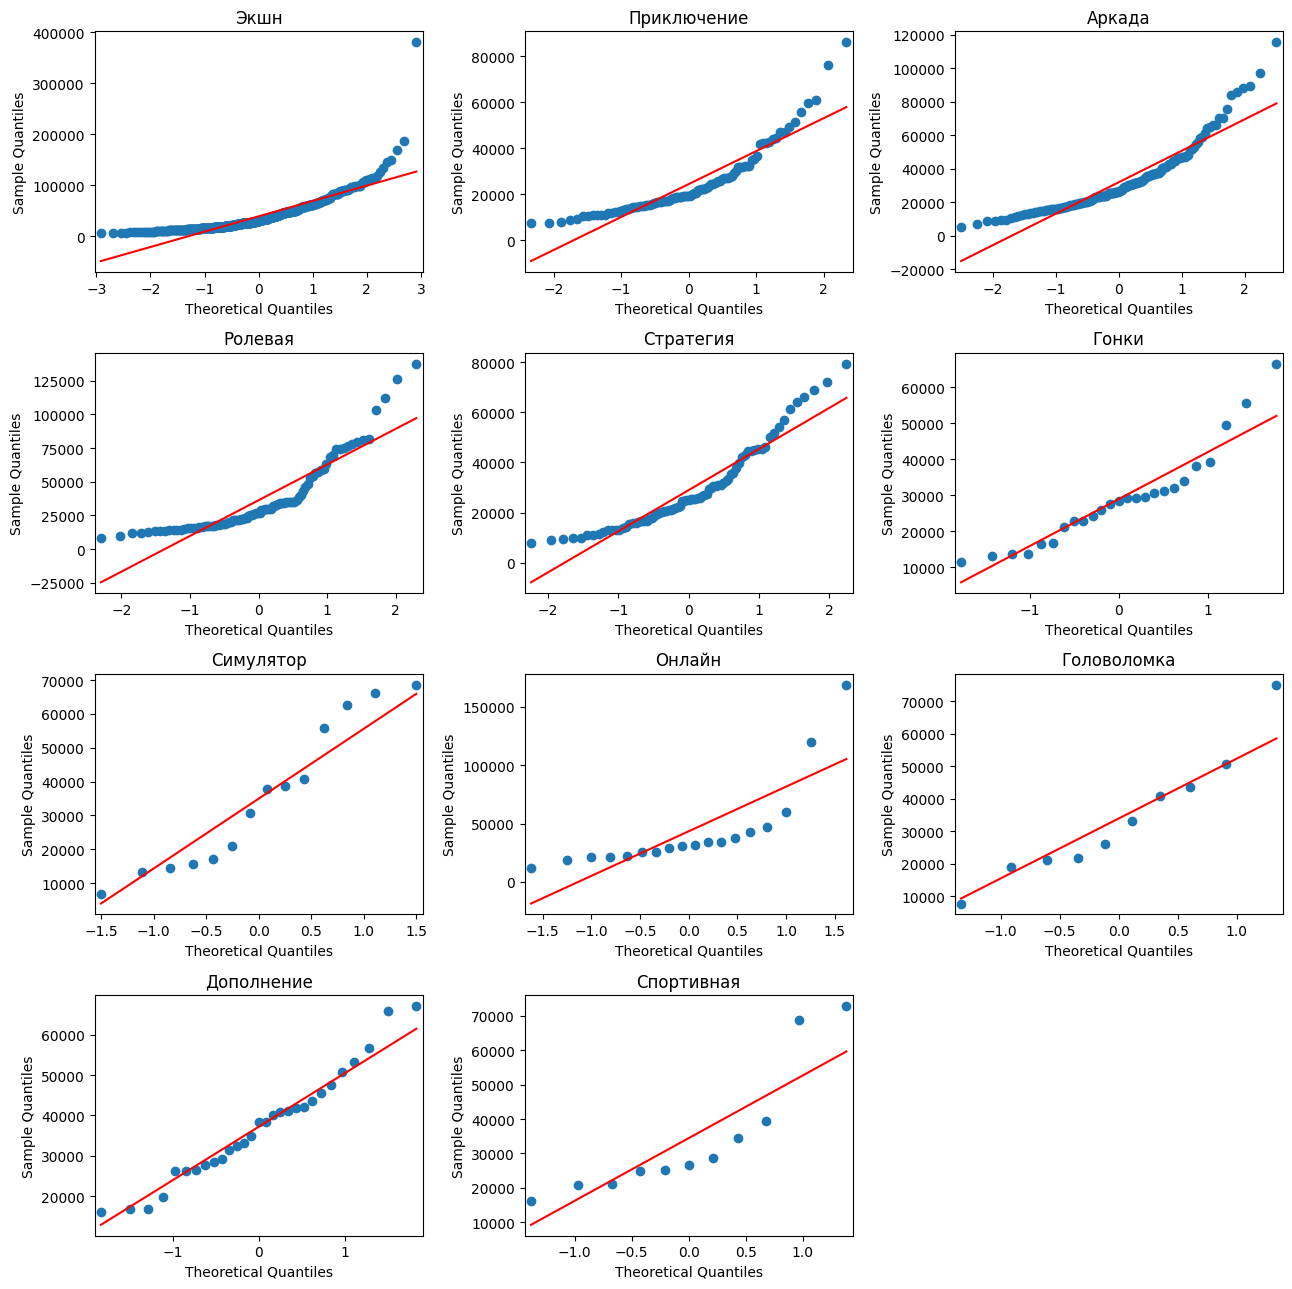

In [26]:
# check groups' normality using QQ plots
from statsmodels.api import qqplot

fig=plt.figure(figsize=(13,13))
i = 0
for genre in sliced_df['Genre'].unique():
    ax = fig.add_subplot(len(sliced_df['Genre'].unique())//3+1,3,i+1)
    qqplot(data = sliced_df[sliced_df['Genre'] == genre]['Views'], line='s', ax=ax)
    ax.set_title(genre)
    i += 1
plt.tight_layout()
plt.show()

Graphical representation shows lack of normality. Let's use statistic test for normality.

There are many tests for normality of data. Take a few of them: *the Kolmogorov-Smirnov test* (is used for n $\geq$ 50), *the Shapiro-Wilk test* (isn’t reliable with n > 2,000, better to use it with n $\leq$ 50), *the Anderson-Darling test* (may be used with small sample sizes n $\leq$ 25), *the Jarque-Bera test* (usually is used for large dataset). In all tests $H_0$: data follow normal distribution.

In [27]:
import scipy.stats as stats

normal_genres = {}
def normality_test_inference(name, pval):
    if pval < 0.05:
        print(f'p-value of {name} test is less than 0.05. H0 rejected. Data are NOT normally distributed')
        return None
    else:
        print(f'p-value of {name} test is greater than 0.05. H0 accepted . Data are normally distributed')
        return name

for genre in sliced_df['Genre'].unique():
    print(genre)
    normal_genres[genre] = []
    x = sliced_df[sliced_df['Genre'] == genre]['Views']
    
    pval = stats.kstest(x, 'norm')[1]
    print(pval)
    normal_genres[genre].append(normality_test_inference('Kolmogorov-Smirnov', pval))
    
    pval = stats.shapiro(x)[1]
    print(pval)
    normal_genres[genre].append(normality_test_inference('Shapiro-Wilk test', pval))
    
    anderson_test = stats.anderson(x)
    statistic = anderson_test[0]
    critical_value_5_perc = anderson_test[1][2]
    print(statistic, critical_value_5_perc)
    if statistic > critical_value_5_perc:
        print("Test statistic of Anderson-Darling test is greater than critical value. H0 rejected. Data are NOT normally distributed")
        normal_genres[genre].append(None)
    else:
        print("Test statistic of Anderson-Darling test is less than critical value. H0 accepted . Data are normally distributed")
        normal_genres[genre].append('Anderson-Darling test')
    
    pval = stats.jarque_bera(x)[1]
    print(pval)
    normal_genres[genre].append(normality_test_inference('Jarque-Bera test', pval))
    print('\n')

Экшн
0.0
p-value of Kolmogorov-Smirnov test is less than 0.05. H0 rejected. Data are NOT normally distributed
5.293449748509914e-28
p-value of Shapiro-Wilk test test is less than 0.05. H0 rejected. Data are NOT normally distributed
23.280333695801687 0.781
Test statistic of Anderson-Darling test is greater than critical value. H0 rejected. Data are NOT normally distributed
0.0
p-value of Jarque-Bera test test is less than 0.05. H0 rejected. Data are NOT normally distributed


Приключение
0.0
p-value of Kolmogorov-Smirnov test is less than 0.05. H0 rejected. Data are NOT normally distributed
2.2620325612621173e-09
p-value of Shapiro-Wilk test test is less than 0.05. H0 rejected. Data are NOT normally distributed
4.838083576177624 0.759
Test statistic of Anderson-Darling test is greater than critical value. H0 rejected. Data are NOT normally distributed
1.2236366849825083e-25
p-value of Jarque-Bera test test is less than 0.05. H0 rejected. Data are NOT normally distributed


Аркада
0.0
p

In [28]:
normal_genres

{'Экшн': [None, None, None, None],
 'Приключение': [None, None, None, None],
 'Аркада': [None, None, None, None],
 'Ролевая': [None, None, None, None],
 'Стратегия': [None, None, None, None],
 'Гонки': [None, None, None, None],
 'Симулятор': [None,
  'Shapiro-Wilk test',
  'Anderson-Darling test',
  'Jarque-Bera test'],
 'Онлайн': [None, None, None, None],
 'Головоломка': [None,
  'Shapiro-Wilk test',
  'Anderson-Darling test',
  'Jarque-Bera test'],
 'Дополнение': [None,
  'Shapiro-Wilk test',
  'Anderson-Darling test',
  'Jarque-Bera test'],
 'Спортивная': [None, None, None, 'Jarque-Bera test']}

Three genres stand out of the rest. It's 'Симулятор', 'Головоломка' and 'Дополнение'. The last two genres have statistically significant results of test for normality which are concordant with graphical results. So we can conclude that 'Головоломка' and 'Дополнение' are normally distributed, but the rest genres are not.

**In generall, assumption of normality of group is violated**

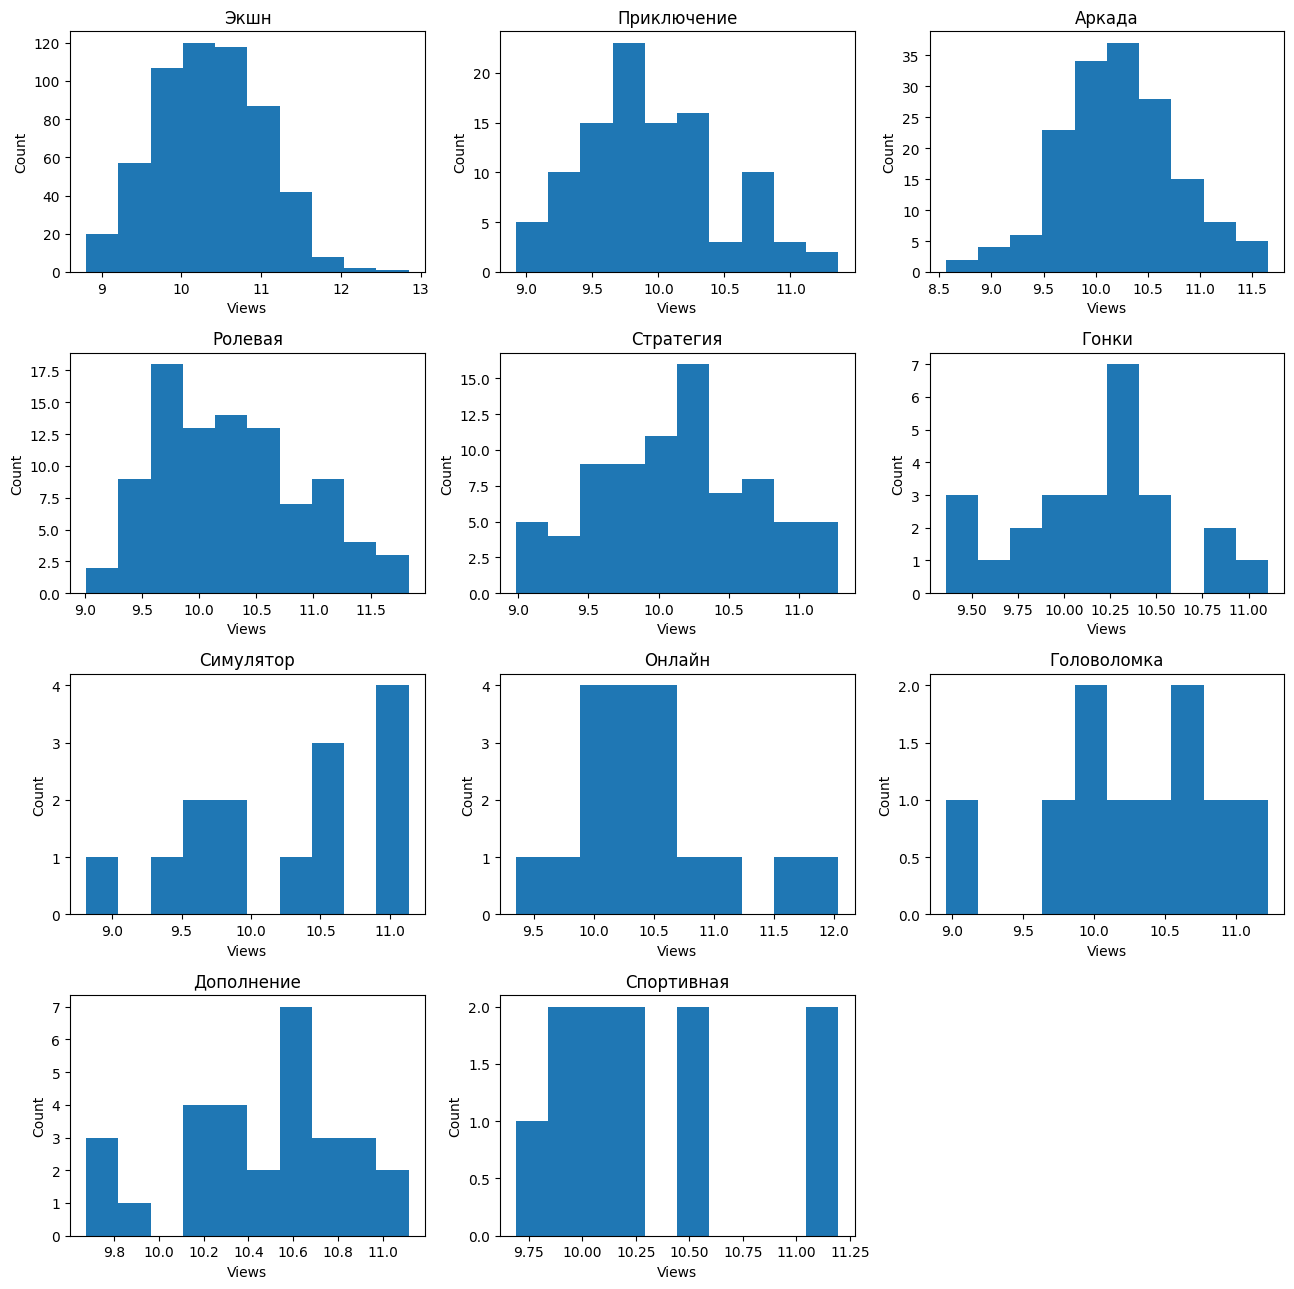

In [29]:
# May be log scaling can make data normalized
for_test_variance = []
genres = []
i = 0
fig=plt.figure(figsize=(13,13))
for genre in sliced_df['Genre'].unique():
    subdf = for_test_variance.append(sliced_df['Views'][sliced_df['Genre'] == genre])
    ax=fig.add_subplot(len(sliced_df['Genre'].unique())//3+1,3,i+1)
    ax.hist(np.log(sliced_df['Views'][sliced_df['Genre'] == genre]), bins=10)
    ax.set_title(genre)
    ax.set_xlabel('Views')
    ax.set_ylabel('Count')
    i += 1
plt.tight_layout()

Some genres became to look more like normally distributed, but it is not enough

Now check the assumption of equal variance in groups

In [30]:
sliced_df.groupby(['Genre'])['Views'].var()

Genre
Аркада         3.560080e+08
Головоломка    3.786969e+08
Гонки          1.775769e+08
Дополнение     1.822011e+08
Онлайн         1.544837e+09
Приключение    2.077141e+08
Ролевая        7.106603e+08
Симулятор      4.585483e+08
Спортивная     3.657926e+08
Стратегия      2.724598e+08
Экшн           9.080723e+08
Name: Views, dtype: float64

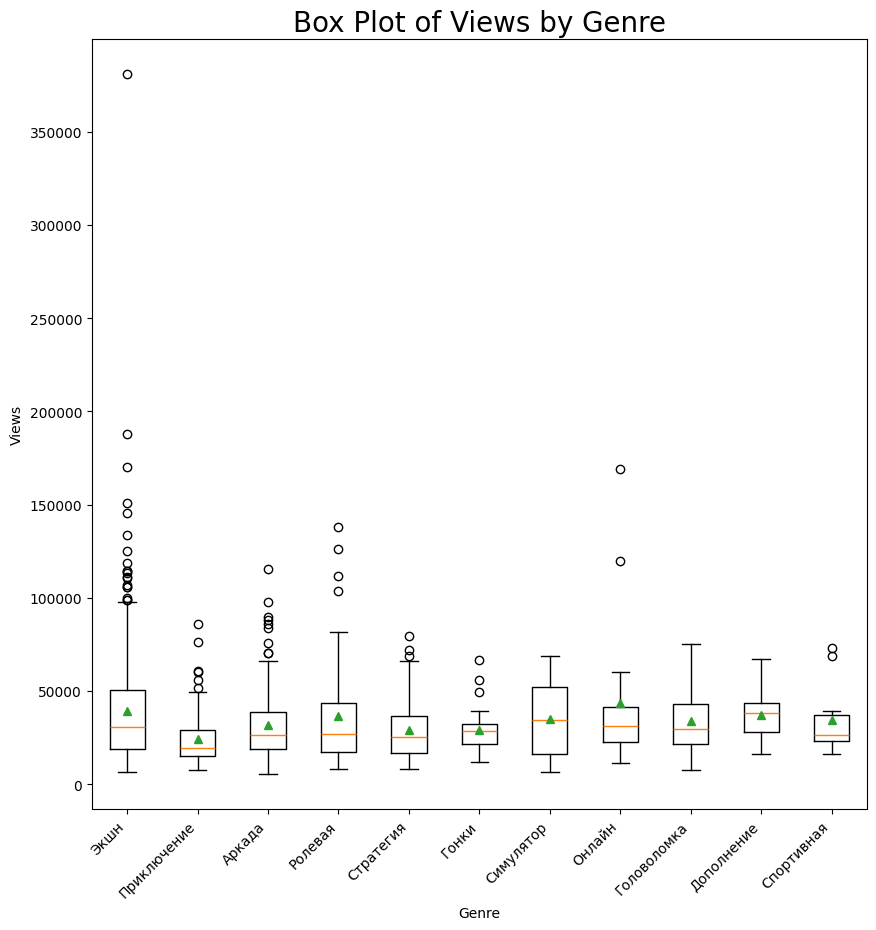

In [31]:
# firstly, apply graphical testing of homogeneity of variances using boxplots
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Views by Genre", fontsize= 20)
ax.set

for_test_variance = []
genres = []
for genre in sliced_df['Genre'].unique():
    for_test_variance.append(sliced_df[sliced_df['Genre'] == genre]['Views'])
    genres.append(genre)

ax.boxplot(for_test_variance,
           labels= genres,
           showmeans= True)

plt.xlabel('Genre')
plt.ylabel('Views')
plt.xticks(rotation=45, ha='right')
plt.show()

To check this assumption apply Levene's test for homogeneity of variance

In [32]:
from scipy.stats import levene
levene(*for_test_variance)

LeveneResult(statistic=4.132029871269136, pvalue=1.2718513314479504e-05)

pvalue $\ll$ 0.05, therefore we can reject null-hypothesis about equality of variance in groups

**In generall, assumption of homogeneity of variance of groups is also violated**

The ANOVA test is not appropriate in this case. Use the non-parametric equivalent to ANOVA --- the Kruskal-Wallis test instead 

**Kruskal-Wallis test**

The null hypothesis of this test is that all samples (genres) are from identical population. Instead of average value it uses rank (some sources claim that the null hypothesis of this test is about equality of medians of samples). The alternative hypothesis argues that not all samples are from identical population.

In [33]:
import scipy.stats as stats
stats.kruskal(*list(sliced_df.groupby(['Genre'])['Views'].agg(list)))

KruskalResult(statistic=46.61448983710133, pvalue=1.1095895629126528e-06)

pvalue $\ll$ 0.05, therefore we can reject $H_0$, there is strong evidence that views differ between genres. So we need then to use post-hoc analysis to find out which genres differ from each other.

In [34]:
import scikit_posthocs as sp
multi_comparison_table = sp.posthoc_dunn(sliced_df, val_col='Views', group_col='Genre', p_adjust = 'bonferroni')
multi_comparison_table = multi_comparison_table[multi_comparison_table < 0.05]
multi_comparison_table = (multi_comparison_table.where(np.triu(np.ones(multi_comparison_table.shape)).astype(bool))
                                                .stack().reset_index())
multi_comparison_table

,level_0,level_1,0
0,Аркада,Приключение,2.455121e-02
1,Дополнение,Приключение,1.397691e-03
2,Приключение,Ролевая,2.853746e-02
3,Приключение,Экшн,1.407527e-07


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Приключение vs. Аркада: Custom statistical test, P_val:2.455e-02
Экшн vs. Приключение: Custom statistical test, P_val:1.408e-07
Приключение vs. Ролевая: Custom statistical test, P_val:2.854e-02
Приключение vs. Дополнение: Custom statistical test, P_val:1.398e-03


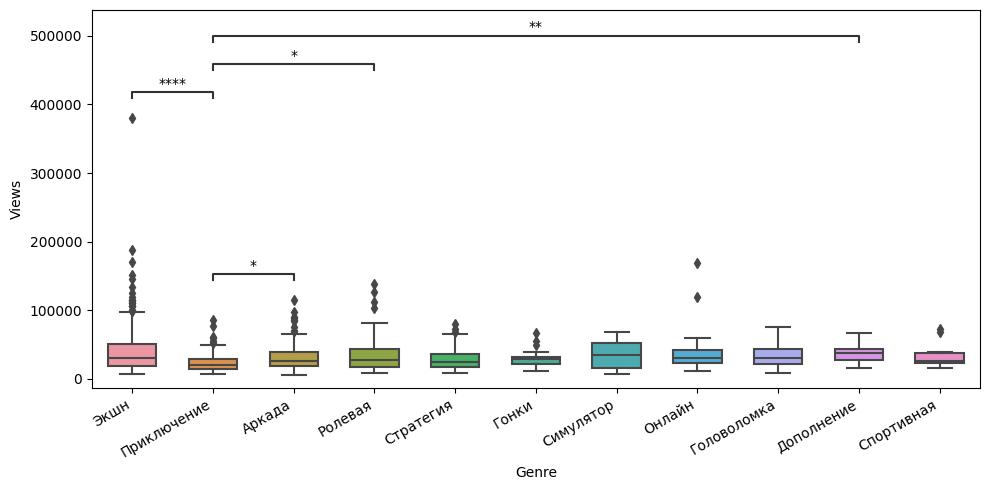

In [35]:
import seaborn as sns
from statannotations.Annotator import Annotator

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=sliced_df, x='Genre', y='Views', width=0.6)

pairs = [(i[1]['level_0'], i[1]['level_1']) for i in multi_comparison_table.iterrows()]
p_values = [i[1][0] for i in multi_comparison_table.iterrows()]

annotator = Annotator(
    ax, pairs, data=sliced_df, x='Genre', y='Views'
)
annotator.configure(text_format='star', loc='inside')
annotator.set_pvalues_and_annotate(p_values)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()

Because the Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal, take a look at medians of the genres.

In [36]:
sliced_df.groupby(['Genre'])['Views'].agg([np.median, np.mean])

,median,mean
Genre,,
Аркада,26406.0,31916.209877
Головоломка,29670.5,33952.200000
Гонки,28436.0,28989.600000
Дополнение,38284.0,37197.448276
Онлайн,30963.0,43409.055556
Приключение,19408.5,24414.862745
Ролевая,26906.0,36288.152174
Симулятор,34261.0,34958.642857
Спортивная,26575.0,34435.363636


**Conclusion**

The genres 'Экшн', 'Аркада' and 'Дополнение' significantly distinct from 'Приключение' separately. Others pairs of genres have no statistically significant differences. Comparison of the medians of the groups showed that medians of 'Экшн', 'Аркада' and 'Дополнение' are larger than the one of 'Приключение' correspondingly. Mean value of 'Приключение' is also the lowest.

# *The reviews of the games in 'Приключение' genre are the least attractive for stopgame.ru users than of the games in any other genre.*